In [76]:
#importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading of dataset
df=pd.read_csv("/content/train_s3TEQDk.csv")

In [3]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
#Creating list of categorical column for checking count
categorical_col=["Gender","Occupation","Channel_Code","Credit_Product","Is_Active","Is_Lead"]

In [5]:
#Checking null values
df.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [6]:
#Credic_Product value count
df["Credit_Product"].value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [7]:
#Fill null value with maximum repeated value "No"
df["Credit_Product"]=df["Credit_Product"].fillna("No")

In [8]:
df.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [9]:
df["Credit_Product"].value_counts()

No     173682
Yes     72043
Name: Credit_Product, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

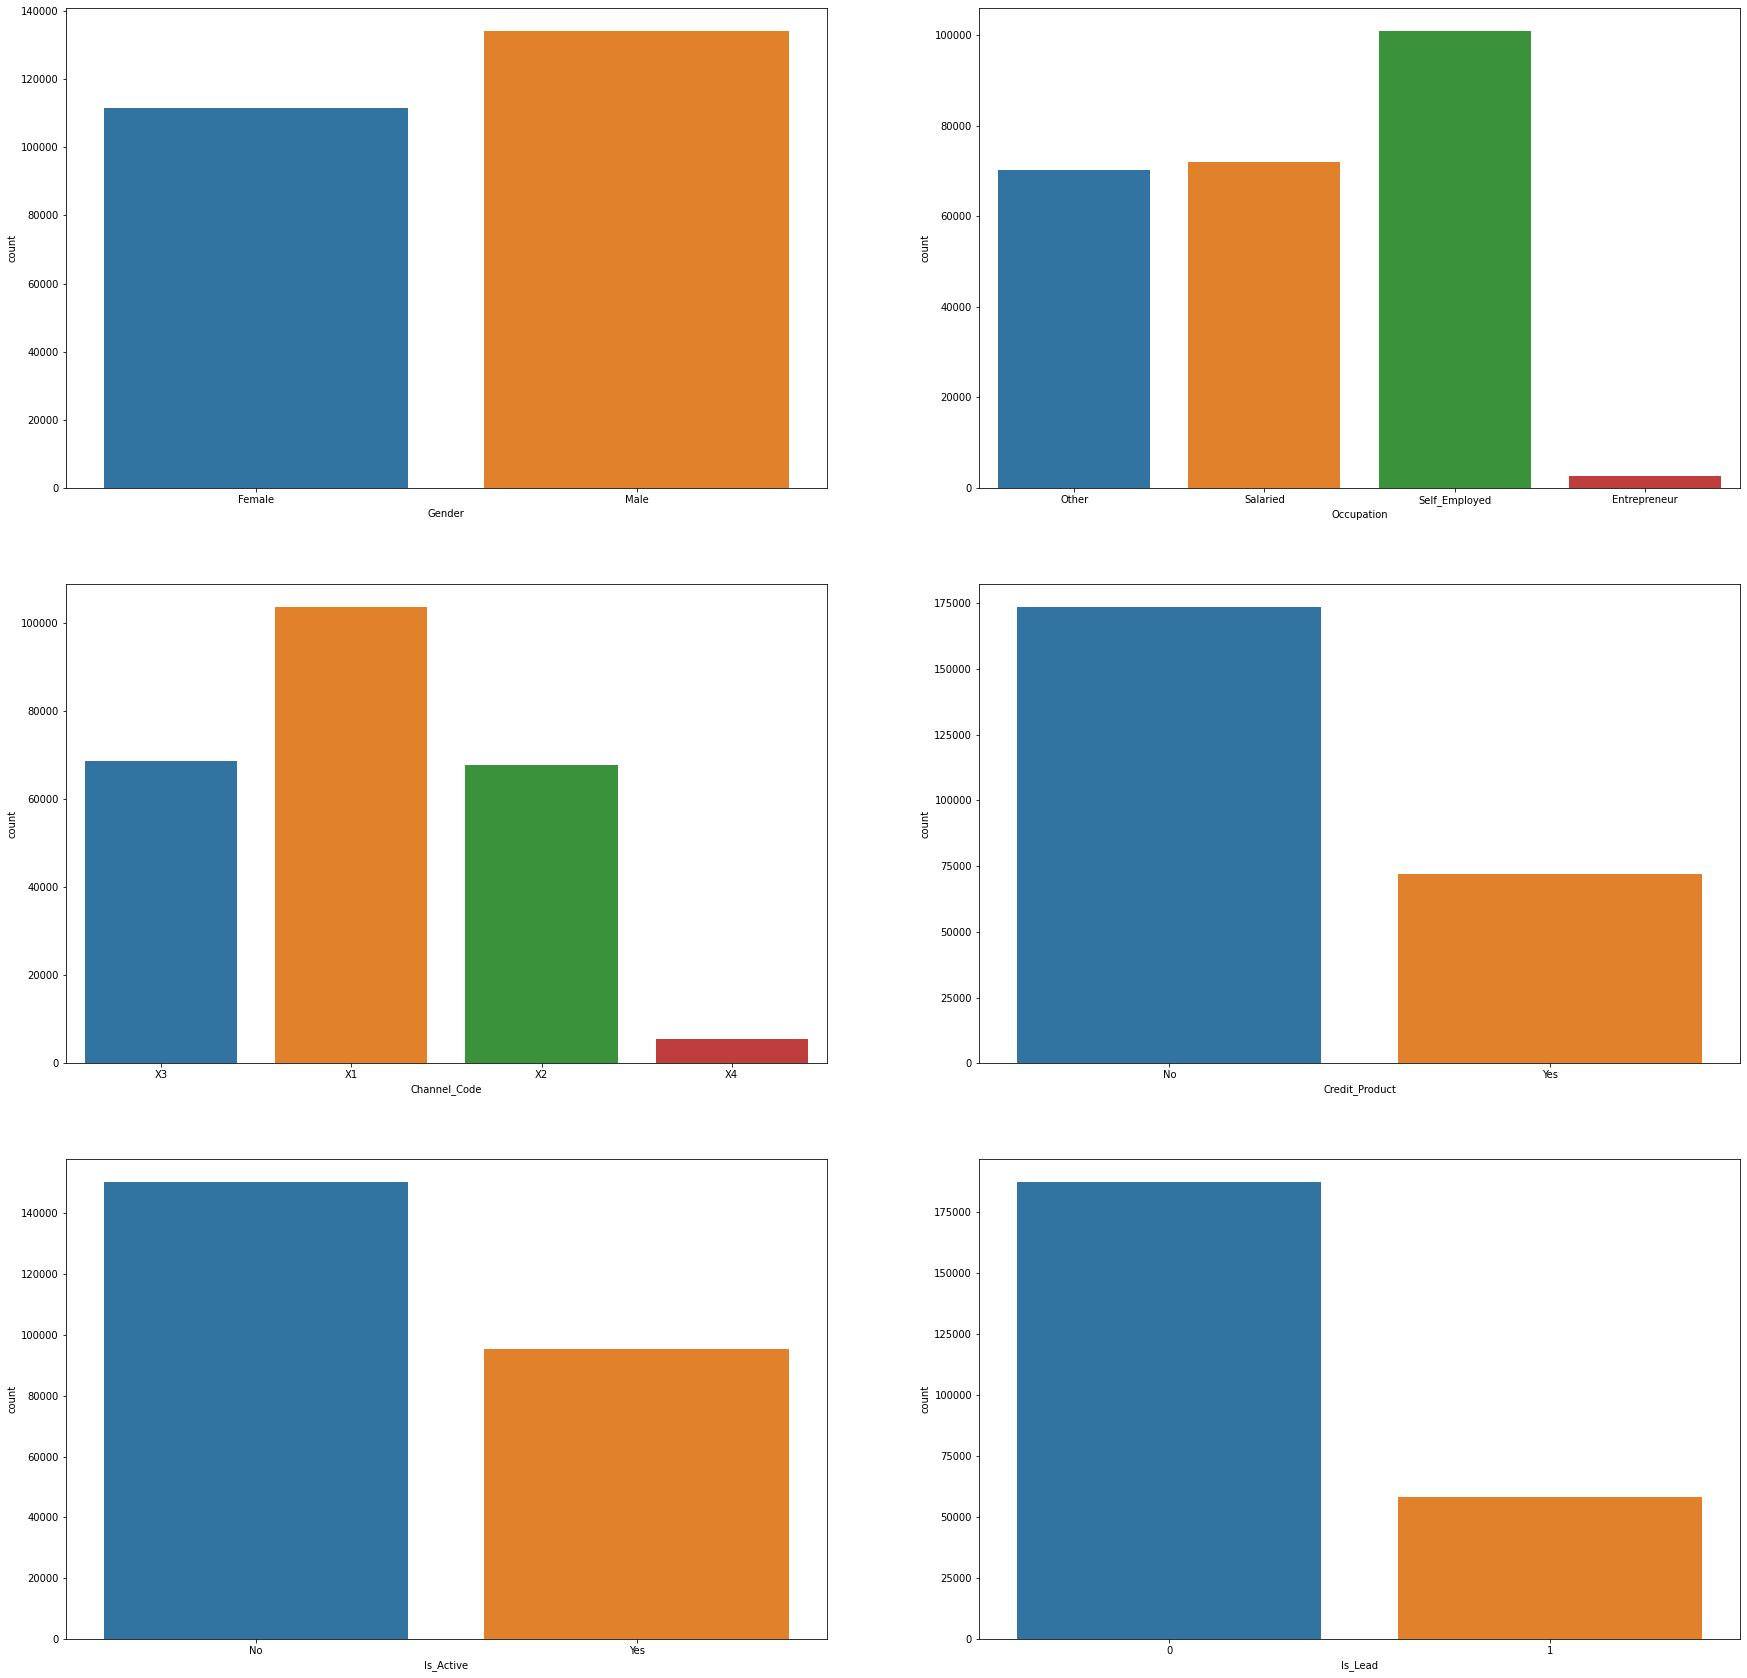

In [10]:
#Ploting countplot for checking count of each categorical columns
plt.figure(figsize=(30,30))
for i in range (len(categorical_col)):
  plt.subplot(3,2,i+1)
  sns.countplot(categorical_col[i],data=df)
plt.show()

In [11]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [12]:
#Importing LabelEncoder for converting categorical to numeric
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [13]:
#Apply label encoder to each categorical columns
df["Gender"]=encoder.fit_transform(df["Gender"])
df["Occupation"]=encoder.fit_transform(df["Occupation"])
df["Channel_Code"]=encoder.fit_transform(df["Channel_Code"])
df["Credit_Product"]=encoder.fit_transform(df["Credit_Product"])
df["Is_Active"]=encoder.fit_transform(df["Is_Active"])

In [14]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,0,73,RG268,1,2,43,0,1045696,0,0
1,IDD62UNG,0,30,RG277,2,0,32,0,581988,0,0
2,HD3DSEMC,0,56,RG268,3,2,26,0,1484315,1,0
3,BF3NC7KV,1,34,RG270,2,0,19,0,470454,0,0
4,TEASRWXV,0,30,RG282,2,0,33,0,886787,0,0


In [15]:
#Seperating independant variable
x=df[["Gender","Age","Occupation","Channel_Code","Vintage","Credit_Product","Avg_Account_Balance","Is_Active"]]

In [16]:
#Seperating dependant variable
y=df[["Is_Lead"]]

In [17]:
y.head()

,Is_Lead
0,0
1,0
2,0
3,0
4,0


In [18]:
not_intrested=df[df["Is_Lead"]==0]

In [19]:
intrested=df[df["Is_Lead"]==1]

In [20]:
#We have huge imbalance data that there are maximum number of "0" and very less number of "1" hence we have to make it balance I import this library for oversampling
from imblearn.combine import SMOTETomek

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [21]:
#Apply SMOTETomek
smk=SMOTETomek(random_state=42)
x_res,y_res=smk.fit_sample(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [22]:
x_res.shape

(333958, 8)

In [ ]:
y_res.shape

(333958,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


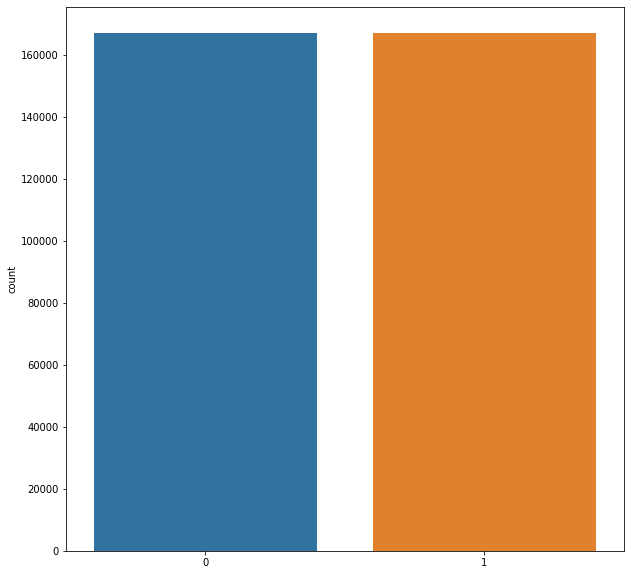

In [23]:
#See now we have equal amount of "0" and "1" so it has created that much of similar datapoints
plt.figure(figsize=(10,10))
sns.countplot(y_res)

In [24]:
#Check amount of "0" and "1"
from collections import Counter
print("Original dataset{}".format(Counter(y)))
print("Resampled dataset{}".format(Counter(y_res)))

Original datasetCounter({'Is_Lead': 1})
Resampled datasetCounter({0: 166979, 1: 166979})


In [25]:
#Importing Train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [26]:
#apply Train_test_split
x_res_train,x_res_test,y_res_train,y_res_test=train_test_split(x_res,y_res,test_size=0.4,random_state=12)

In [27]:
#I am going to apply xgboost model as it works very effciently 
from xgboost import XGBClassifier

In [28]:

model=XGBClassifier(n_estimators=50,learning_rate=1)

In [29]:
#Fit model
model.fit(x_res_train,y_res_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=1,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
              n_estimators=50, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [30]:
#Predict value
y_pred=model.predict(x_res_test)

In [31]:
#importing metrics from sklearn for checking accuracy,precision,recall
from sklearn import metrics

In [32]:
#applying confusion metrics
cnf_met=metrics.confusion_matrix(y_res_test,y_pred)

In [33]:
#Check confusion metrics
cnf_met

array([[57047,  9546],
       [15942, 51049]])

In [34]:
#Check Accuracy
metrics.accuracy_score(y_res_test,y_pred)

0.809198706431908

In [35]:
#Check Precision
metrics.precision_score(y_res_test,y_pred)

0.8424622493605083

In [36]:
#Check Recall
metrics.recall_score(y_res_test,y_pred)

0.7620277350688899

In [77]:
### We are getting good accuracy along with precision and recall

In [37]:
#we have test data and going to precict "Is_Lead"
#preprocess data so that we can apply it to predict
df1=pd.read_csv("/content/test_mSzZ8RL.csv")

In [38]:
df1.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [40]:
df1.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [42]:
df1["Credit_Product"].value_counts()

No     61608
Yes    31182
Name: Credit_Product, dtype: int64

In [44]:
df1["Credit_Product"]=df1["Credit_Product"].fillna("No")

In [45]:
df1.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,1,29,RG254,1,0,25,Yes,742366,No
1,CCMEWNKY,1,43,RG268,1,1,49,No,925537,No
2,VK3KGA9M,1,31,RG270,2,0,14,No,215949,No
3,TT8RPZVC,1,29,RG272,1,0,33,No,868070,No
4,SHQZEYTZ,0,29,RG270,1,0,19,No,657087,No


In [46]:
df1["Gender"]=encoder.fit_transform(df1["Gender"])
df1["Occupation"]=encoder.fit_transform(df1["Occupation"])
df1["Channel_Code"]=encoder.fit_transform(df1["Channel_Code"])
df1["Credit_Product"]=encoder.fit_transform(df1["Credit_Product"])
df1["Is_Active"]=encoder.fit_transform(df1["Is_Active"])

In [47]:
df1.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,1,29,RG254,1,0,25,1,742366,0
1,CCMEWNKY,1,43,RG268,1,1,49,0,925537,0
2,VK3KGA9M,1,31,RG270,2,0,14,0,215949,0
3,TT8RPZVC,1,29,RG272,1,0,33,0,868070,0
4,SHQZEYTZ,0,29,RG270,1,0,19,0,657087,0


In [49]:
test_data=df1[["Gender","Age","Occupation","Channel_Code","Vintage","Credit_Product","Avg_Account_Balance","Is_Active"]]

In [51]:
test_data.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,1,29,1,0,25,1,742366,0
1,1,43,1,1,49,0,925537,0
2,1,31,2,0,14,0,215949,0
3,1,29,1,0,33,0,868070,0
4,0,29,1,0,19,0,657087,0


In [65]:
S=test_data.values

In [66]:
#Apply model to dataset
Is_Lead=model.predict(S)

In [71]:
df1["Is_Lead"]=Is_Lead

In [72]:
df1.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,VBENBARO,1,29,RG254,1,0,25,1,742366,0,0
1,CCMEWNKY,1,43,RG268,1,1,49,0,925537,0,1
2,VK3KGA9M,1,31,RG270,2,0,14,0,215949,0,0
3,TT8RPZVC,1,29,RG272,1,0,33,0,868070,0,0
4,SHQZEYTZ,0,29,RG270,1,0,19,0,657087,0,0


In [73]:
#Taking "ID" & "Is_Lead" in datset Submission
Submission=df1.loc[:,("ID","Is_Lead")]

In [74]:
Submission.head()

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,1
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0


In [75]:
#converting Submission to csv
Submission.to_csv("/content/Submission/Submission.csv")